In [ ]:
1. Выбор сообществ https://vk.com/cheplovets https://vk.com/sports_swimming
2. Сохраните списки участников выбранных сообществ. Сохраните последние 2000 постов каждого из сообществ 

In [1]:
#imports
!pip install vk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vk: filename=vk-2.0.2-py3-none-any.whl size=8278 sha256=c36f36feb6aa88779df4b3fec0796366afbac2b73011d18b9cd3f697251a4f1c
  Stored in directory: /root/.cache/pip/wheels/7b/d0/2b/d07628ebced43577b8001d0c9d716f972059535bbaadb1eb9d
Successfully built vk


##Скачиваем 2000 постов для каждого сообщества и сохраняем id участников

In [2]:
import vk
session = vk.Session(access_token='bf212be1bf212be1bf212be162bf4fd7aabbf21bf212be1e135d524e9faaccc9e813e18')
vk_api = vk.API(session)

In [51]:
#get posts
sport_swim_topik = list()
sport_cheplovets_topik = list()
for l_b in range(0, 2000,100):
  response_posts = vk_api.wall.get(domain="sports_swimming", v= 5.131, extended = 1, offset = l_b, count = 100)
  sport_swim_topik.append(response_posts)

for l_b in range(0, 2000,100):
  response_posts = vk_api.wall.get(domain="cheplovets", v= 5.131, extended = 1, offset = l_b, count = 100)
  sport_cheplovets_topik.append(response_posts)

In [52]:
#get members group 
import time
members_swim = []
n_members = vk_api.groups.getMembers(group_id="sports_swimming", sort="id_asc", v= 5.131)["count"]
for l_b in range(0,n_members,1000):
  time.sleep(0.2)
  members_swim += vk_api.groups.getMembers(group_id="sports_swimming", offset = l_b, sort="id_asc", v= 5.131)["items"]

members_cheplovets = []
n_members = vk_api.groups.getMembers(group_id="cheplovets", sort="id_asc", v= 5.131)["count"]

for l_b in range(0,n_members,1000):
  time.sleep(0.2)
  members_cheplovets += vk_api.groups.getMembers(group_id="cheplovets", offset = l_b, sort="id_asc", v= 5.131)["items"]

##Сохраните списки участников выбранных сообществ. Есть ли пользователи, относящиеся к обоим сообществам?

In [53]:
inters_members = set(members_cheplovets).intersection(set(members_swim))

In [54]:
print("Количество пользователей относящиеся к обоим сообществам: ",len(inters_members))

Количество пользователей относящиеся к обоим сообществам:  21108


##Cохраните последние 2000 постов каждого из сообществ (ничего страшного, если их вдруг чуть меньше, в таком случае берём все, что есть). Используются ли в постах хэштеги? Если используются, то составьте топ хэштегов по встречаемости для каждой группы, визуализируйте полученные результаты. Сравните списки на предмет пересечений. 

In [55]:
import re
from typing import List,Dict

def count_hash_tag(hash_tag:List) -> Dict[str,int]:
  final_dict = {}
  for tag in hash_tag:
    if not tag in final_dict:
      final_dict[tag] = 0
    final_dict[tag] += 1 
  return final_dict 


hash_tag_swim = []
for pack_topik in sport_swim_topik:
  for topik in pack_topik["items"]:
    text = topik["text"]
    hash_tag_swim += re.findall(r"#(\w+)", text)

hash_tag_cheplovets = []
for pack_topik in sport_cheplovets_topik:
  for topik in pack_topik["items"]:
    text = topik["text"]
    hash_tag_cheplovets += re.findall(r"#(\w+)", text)

hash_tag_swim = count_hash_tag(hash_tag_swim)

hash_tag_cheplovets = count_hash_tag(hash_tag_cheplovets)


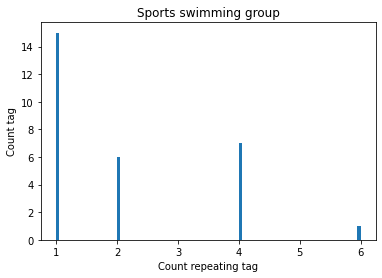

In [56]:
import matplotlib.pyplot as plt
plt.hist(hash_tag_swim.values(), bins = 100)
plt.title("Sports swimming group")
plt.ylabel("Count tag")
plt.xlabel("Count repeating tag");

In [57]:
at_k = 5 
top_hash_tag = sorted(hash_tag_swim.items(),key = lambda x:x[1], reverse=True)[:at_k]
name_tag = []
count_tag = []
for name,count in top_hash_tag:
  name_tag.append(name)
  count_tag.append(count)

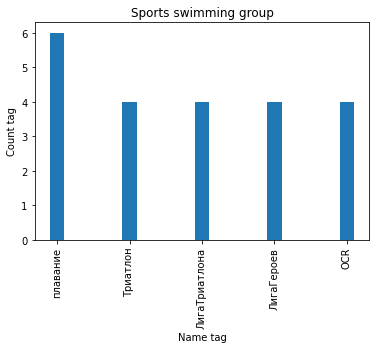

In [58]:
plt.bar(name_tag,count_tag, width=0.2)
plt.title("Sports swimming group")
plt.ylabel("Count tag")
plt.xticks(rotation = 90)
plt.xlabel("Name tag");

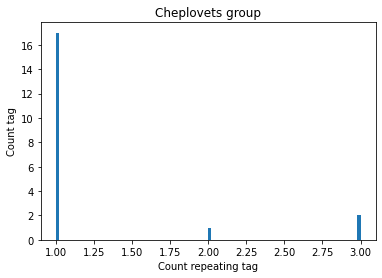

In [59]:
import matplotlib.pyplot as plt
plt.hist(hash_tag_cheplovets.values(), bins = 100)
plt.title("Cheplovets group")
plt.ylabel("Count tag")
plt.xlabel("Count repeating tag");

In [60]:
at_k = 5 
top_hash_tag = sorted(hash_tag_cheplovets.items(),key = lambda x:x[1], reverse=True)[:at_k]
name_tag = []
count_tag = []
for name,count in top_hash_tag:
  name_tag.append(name)
  count_tag.append(count)

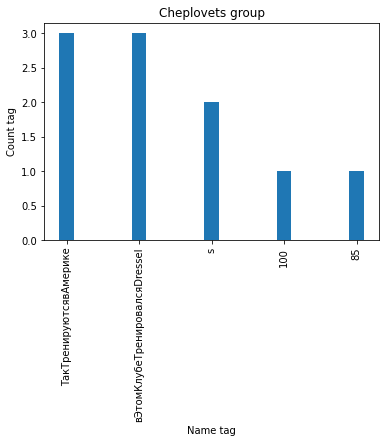

In [61]:
plt.bar(name_tag,count_tag, width=0.2)
plt.title("Cheplovets group")
plt.ylabel("Count tag")
plt.xticks(rotation = 90)
plt.xlabel("Name tag");

In [62]:
n_tags_inters = len(set(hash_tag_swim.keys()).intersection(set(hash_tag_cheplovets.keys())))

print("Количество пересечений по хэштегам в группах: ",n_tags_inters)

Количество пересечений по хэштегам в группах:  0


##Посчитайте количество постов за каждый час суток для обоих сообществ, визуализируйте результаты. 
##В какое время суток наиболее активны участники социальных групп? Совпадают ли часы с наибольшей активностью для обоих сообществ?

In [63]:
def compute_number_post_hour(posts):
  """
  List в рамках одного дня
  """
  n_posts = {i:0 for i in range(0, 24)}
  for post in posts:
    data_time = datetime.utcfromtimestamp(post["date"]).strftime('%Y-%m-%d %H:%M:%S')
    hour = data_time.split()[-1].split(":")[0]
    n_posts[int(hour)] += 1 
  return n_posts

In [64]:
from datetime import datetime

def find_most_activity_day(pack_posts):

  n_post = -1 
  max_post = -1
  curr_day = None
  past_idx_pack = past_idx_title = None
  for idx_pack, pack in enumerate(pack_posts):
    for idx_title, title in enumerate(pack["items"]):
      data_time = title['date']
      data_time = datetime.utcfromtimestamp(data_time).strftime('%Y-%m-%d %H:%M:%S')
      if curr_day != data_time.split()[0].split("-")[-1]:
        if max_post < n_post:
          max_post = n_post
          logger_range = ((past_idx_pack, past_idx_title), (idx_pack, idx_title))
        curr_day = data_time.split()[0].split("-")[-1]
        n_post = 0
        past_idx_pack = idx_pack
        past_idx_title = idx_title

      n_post += 1

  return max_post, logger_range

In [65]:
n_post_swim,range_date_post_swim = find_most_activity_day(sport_swim_topik)

In [66]:
n_post_cheplovets, range_date_post_cheplovets = find_most_activity_day(sport_cheplovets_topik)

In [78]:
cheplovets_posts_day = sport_cheplovets_topik[range_date_post_cheplovets[0][0]]["items"][range_date_post_cheplovets[0][1]:]
cheplovets_posts_day += sport_cheplovets_topik[range_date_post_cheplovets[1][0]]["items"][:range_date_post_cheplovets[1][1]]

In [79]:
swim_posts_day = sport_swim_topik[range_date_post_swim[0][0]]["items"][range_date_post_swim[0][1]: range_date_post_swim[1][1]]

In [80]:
assert len(swim_posts_day) == n_post_swim
assert len(cheplovets_posts_day) == n_post_cheplovets

In [81]:
post_hour_cheplovets = compute_number_post_hour(cheplovets_posts_day)

post_hour_swim = compute_number_post_hour(swim_posts_day)

In [82]:
import numpy as np
arr1 = np.array(list(post_hour_swim.items()))
arr2 = np.array(list(post_hour_cheplovets.items()))

Text(0.5, 1.0, 'Sports swimming group')

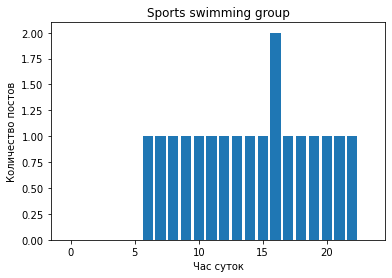

In [83]:
plt.bar(arr1[:,0], arr1[:,1])
plt.ylabel("Количество постов")
plt.xlabel("Час суток")
plt.title("Sports swimming group")

Text(0.5, 1.0, 'Cheplovets group')

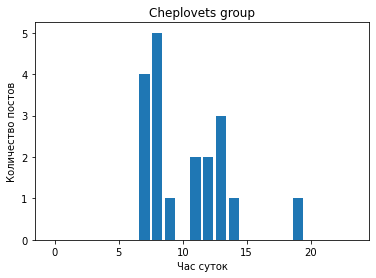

In [84]:
plt.bar(arr2[:,0], arr2[:,1])
plt.ylabel("Количество постов")
plt.xlabel("Час суток")
plt.title("Cheplovets group")

Активность будем мерить комментариями

In [85]:
def compute_number_likes_post_hour(posts):
  """
  List в рамках одного дня
  """
  n_posts = {i:0 for i in range(0, 24)}
  for post in posts:
    data_time = datetime.utcfromtimestamp(post["date"]).strftime('%Y-%m-%d %H:%M:%S')
    hour = data_time.split()[-1].split(":")[0]
    n_posts[int(hour)] += post["likes"]["count"]
  return n_posts

In [86]:
like_post_hour_cheplovets = compute_number_likes_post_hour(cheplovets_posts_day)

like_post_hour_swim = compute_number_likes_post_hour(swim_posts_day)

Text(0.5, 1.0, 'Sports swimming group')

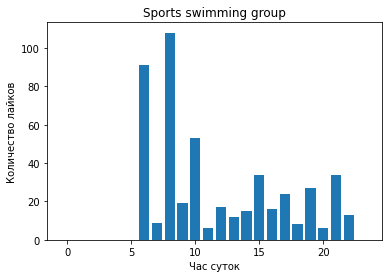

In [87]:
arr1 = np.array(list(like_post_hour_swim.items()))
arr2 = np.array(list(like_post_hour_cheplovets.items()))
plt.bar(arr1[:,0], arr1[:,1])
plt.ylabel("Количество лайков")
plt.xlabel("Час суток")
plt.title("Sports swimming group")

Text(0.5, 1.0, 'Cheplovets group')

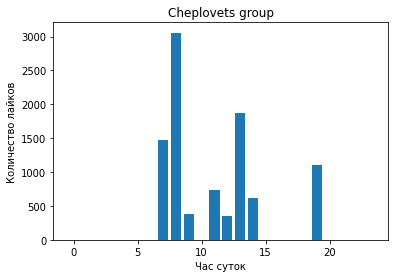

In [88]:
plt.bar(arr2[:,0], arr2[:,1])
plt.ylabel("Количество лайков")
plt.xlabel("Час суток")
plt.title("Cheplovets group")

Часы активности совпадают, наиболее активны утром.

##Постройте социальные графы для обоих сообществ.

In [ ]:
1. пользователь в сообществе - для него надо найти всех его друзей находящихся в этом сообществе.
2. Получим связи между друзьями в рамках одного сообщества.

In [89]:
from tqdm import tqdm
def build_dict_connocetion(members_group):
  member_connection = dict()
  privat_user = []
  members_group = set(members_group)
  for member in tqdm(members_group):
   try:
    friend_member = vk_api.friends.get(user_id=member,order = "random", v= 5.131)["items"]
   except:
     privat_user.append(member)
     continue
   member_connection[member] = []
   for friend in friend_member:
     if friend in members_group:
       member_connection[member].append(friend)
  return member_connection, privat_user

Если хотим построить социальный граф для другой группы замените members_cheplovets на members_swim

In [90]:
member_connection, privat_user = build_dict_connocetion(members_swim[:1000])
member_connection_cheplov, privat_user_cheplov = build_dict_connocetion(members_cheplovets[:1000]) 

100%|██████████| 1000/1000 [00:58<00:00, 17.14it/s]


In [91]:
import networkx as nx
from matplotlib import pylab
import matplotlib.pyplot as plt
import community

In [92]:
g_swim = nx.DiGraph(member_connection)
g_cheplov = nx.DiGraph(member_connection_cheplov)

Постройте социальные графы для обоих сообществ.

In [94]:


def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(50, 50), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)

    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_labels(graph, pos)

    # cut = 1.00
    # xmax = cut * max(xx for xx, _ in pos.values())
    # ymax = cut * max(yy for _, yy in pos.values())
    # plt.xlim(0, xmax)
    # plt.ylim(0, ymax)

    plt.savefig(file_name, bbox_inches="tight")
    pylab.close()

    del fig

save_graph(g_swim,"my_graph.pdf")

Сколько узлов получилось в каждом из графов? А сколько рёбер?

In [96]:
print("Количество узлов в графе: ", g_swim.number_of_nodes())
print("Количество ребер в графе: ", g_swim.number_of_edges())

Количество узлов в графе:  222
Количество ребер в графе:  121


При помощи кластеризации выделите сообщества внутри обоих графов. Сколько сообществ получилось выделить в исследуемых графах?

In [97]:
import community.community_louvain  as com_clastering
import matplotlib.cm as cm

In [98]:
G_undirected = g_swim.to_undirected()
partition = com_clastering.best_partition(G_undirected)
communities = set(partition.values())
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}


highest_degree = {k: sorted(v, key=lambda x: g_swim.degree(x))[-5:] for k, v in communities_dict.items()}
print('Количество сообществ: ', len(highest_degree))
print('Количество элементов в выделенных сообществах:', ', '.join([str(len(highest_degree[key])) for key in highest_degree]))

Количество сообществ:  136
Количество элементов в выделенных сообществах: 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 2, 2, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1


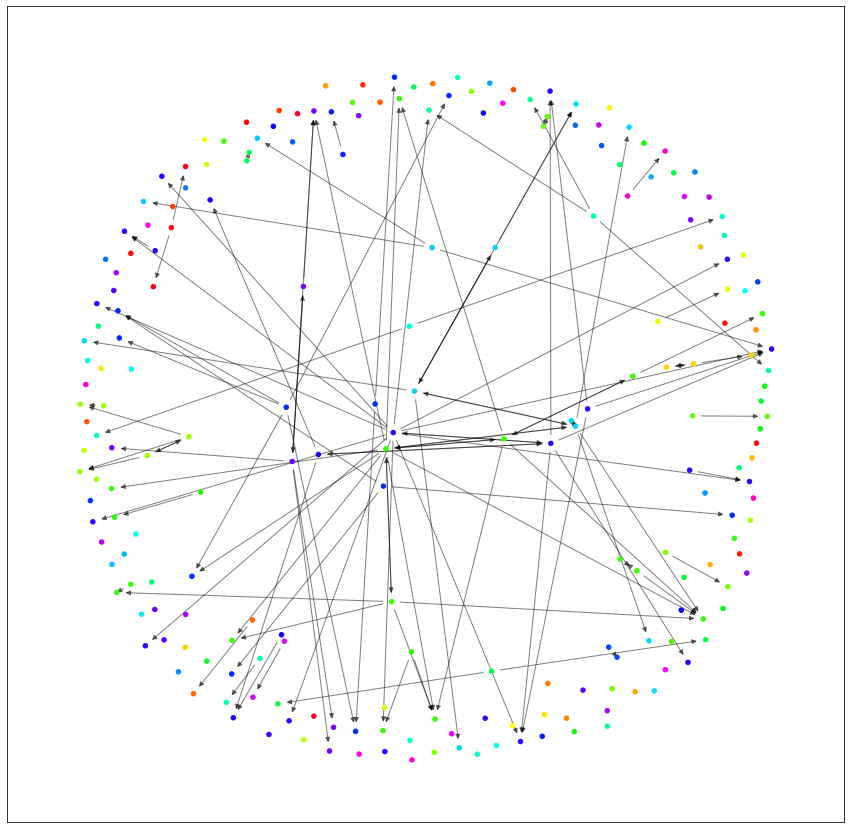

In [101]:
pos = nx.spring_layout(g_swim)
plt.figure(figsize=(15, 15))

cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)

nx.draw_networkx_nodes(g_swim, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g_swim, pos, alpha=0.5)
plt.show()

Удалить кластера мощность до N

Найдем кластра чья мощность меньше N

In [102]:
N = 5 
large_clasters = { name_cl: None for name_cl, data_cl in highest_degree.items() if len(data_cl) >= N}

In [103]:
len(large_clasters)

6

In [104]:
partition_cp = partition.copy()

for name_node in pos.copy():
  if partition_cp[name_node] not in large_clasters:
    pos.pop(name_node)
    g_swim.remove_node(name_node)
    partition.pop(name_node)

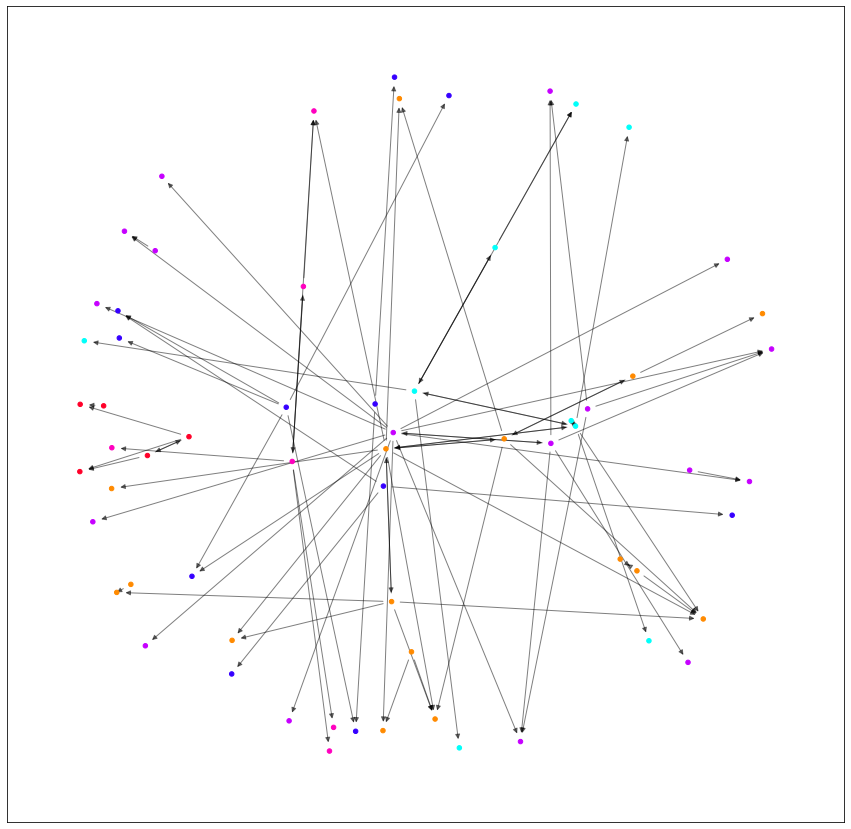

In [105]:
# pos = nx.spring_layout(g)
plt.figure(figsize=(15, 15))

cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)

nx.draw_networkx_nodes(g_swim, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g_swim, pos, alpha=0.5)
plt.show()

In [ ]:
#4 часа 30 минут

# Лаба 2 

## Найдите наиболее авторитетных пользователей

https://networkx.org/documentation/stable/reference/algorithms/centrality.html
В качестве метрики авторитетности пользователя используйте центральность - число минимальных кратчайших путей между любыми двумя его “друзьями” или “собеседниками”, проходящих через него.

In [106]:
betweenness_dict = nx.betweenness_centrality(g_swim)
most_respect_members = sorted(betweenness_dict.items(),key=lambda x: x[1],reverse=True)
print(f"Наиболее авторитетные пользователи {most_respect_members}")

Наиболее авторитетные пользователи [(468451, 0.02304147465437788), (420821, 0.021505376344086023), (158327, 0.011008704557091653), (281207, 0.007936507936507936), (767336, 0.002304147465437788), (197291, 0.0017921146953405018), (269116, 0.0017921146953405018), (468297, 0.0007680491551459293), (1336609, 0.0005120327700972862), (2012682, 0.0002560163850486431), (1408946, 0.0002560163850486431), (90366, 0.0), (1200446, 0.0), (1511968, 0.0), (602682, 0.0), (209749, 0.0), (164847, 0.0), (2143517, 0.0), (99732, 0.0), (626093, 0.0), (882114, 0.0), (1640063, 0.0), (2015012, 0.0), (65358, 0.0), (2043874, 0.0), (825878, 0.0), (1392493, 0.0), (1642613, 0.0), (79867, 0.0), (671879, 0.0), (102530, 0.0), (535297, 0.0), (578455, 0.0), (195179, 0.0), (411855, 0.0), (198190, 0.0), (876176, 0.0), (165307, 0.0), (497260, 0.0), (4189, 0.0), (1642265, 0.0), (213654, 0.0), (533992, 0.0), (334495, 0.0), (930453, 0.0), (1364719, 0.0), (997433, 0.0), (1360063, 0.0), (1615943, 0.0), (1783905, 0.0), (82723, 0.0)

##Вычислите плотность социального графа

Плотность графа - это отношение реального числа связей в графе к максимально возможному в неориентированном графе с тем же числом вершин.

In [107]:
graph_density = nx.density(g_swim)
print(f"Плотность социального графа: {graph_density}")

Плотность социального графа: 0.021577380952380952


##Является ли граф связным? Что это означает применительно к исследуемому социальному графу?

Связный граф - граф, содержащий ровно одну компоненту связности. Это означает, что между любой парой вершин этого графа существует как минимум один путь.

In [108]:
G_undirected = g_swim.to_undirected()
is_connected = nx.is_connected(G_undirected)
print(f"Является ли граф связанным {'No!' if not is_connected else 'Yes!' }")
print("Если социальный граф связан, то каждый член этого графа знаком со всеми другими членами социума")

Является ли граф связанным No!
Если социальный граф связан, то каждый член этого графа знаком со всеми другими членами социума


##Рассчитайте максимальное, минимальное и среднее значение степени узлов графа

In [109]:
degrees = [data for name, data in g_swim.degree()]
avg_degree = sum(degrees)/len(g_swim)
min_degree = min(degrees)
max_degree = max(degrees)

print(f"Максимальное значение степени узла в графе {max_degree}")
print(f"Минимальное значение степени узла в графе {min_degree}")
print(f"Среднее значение степени узла в графе {avg_degree}")

Максимальное значение степени узла в графе 13
Минимальное значение степени узла в графе 1
Среднее значение степени узла в графе 2.71875


##Рассчитайте модулярность графа

Модулярность - это скалярная величина из отрезка [−1, 1], которая количественно описывает неформальное определение структуры сообществ.



In [110]:
import networkx.algorithms.community as nx_comm
#если закинем все ноды в рамках одного кластера то модулярность будет 0
nx_comm.modularity(g_swim, [[name for name in g_swim]])

0.0

In [111]:
# возьмем два самых мощных кластера и посчтиаем модулярность в них
g = nx.DiGraph(member_connection)

In [112]:
G_undirected = g.to_undirected()
partition = com_clastering.best_partition(G_undirected)
communities = set(partition.values())
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}


highest_degree = {k: sorted(v, key=lambda x: g.degree(x))[-5:] for k, v in communities_dict.items()}
print('Количество сообществ: ', len(highest_degree))
print('Количество элементов в выделенных сообществах:', ', '.join([str(len(highest_degree[key])) for key in highest_degree]))

Количество сообществ:  134
Количество элементов в выделенных сообществах: 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 2, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1


In [113]:
import random
pos = nx.spring_layout(g)
large_clasters = { name_cl for name_cl, data_cl in highest_degree.items() if len(data_cl) >= N}
idx1 = random.randrange(0,len(large_clasters))
clasters = list(large_clasters)[:2]
clasters

[98, 100]

In [114]:
partition_cp = partition.copy()

for name_node in pos.copy():
  if partition_cp[name_node] not in clasters:
    pos.pop(name_node)
    g.remove_node(name_node)
    partition.pop(name_node)

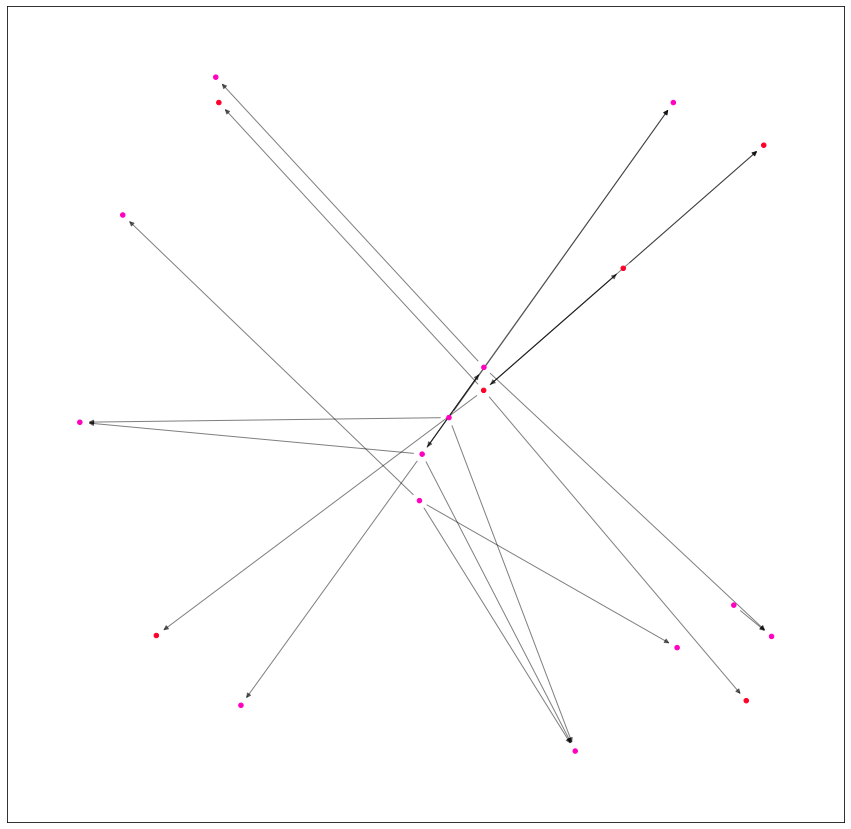

In [115]:
# pos = nx.spring_layout(g)
plt.figure(figsize=(15, 15))

cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)

nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

In [117]:
import networkx.algorithms.community as nx_comm
modularity_close_large  = nx_comm.modularity(g, [{node for node, cls in partition.items() if clasters[0] == cls},
                       {node for node, cls in partition.items() if clasters[1] == cls},
                       ])
print(f"Модулярность между двумя большими класстерами {modularity_close_large}")

Модулярность между двумя большими класстерами 0.4338842975206611


#LAB5

##Постройте функции распределения степеней узлов для обоих сообществ

На какую из известных вам функций похожа каждая из них? В отчёте отразите формулу, график. 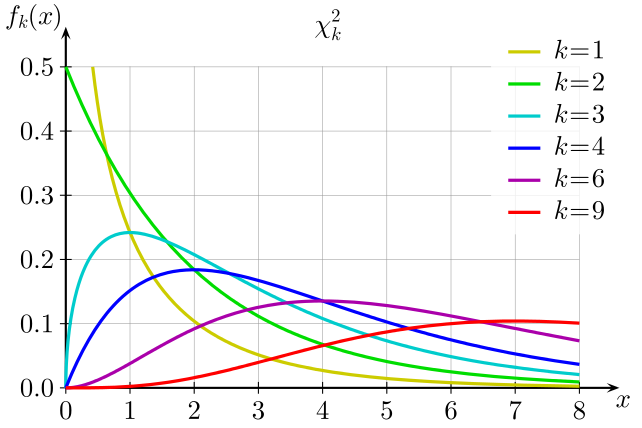

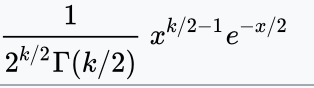

In [ ]:
degrees_swim = [data for name, data in g_swim.degree()]
degrees_cheplov = [data for name, data in g_cheplov.degree()]

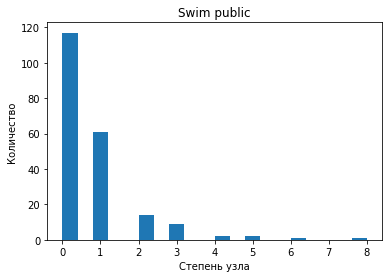

In [ ]:
plt.hist(degrees_swim,bins = 20)
plt.ylabel("Количество")
plt.xlabel("Степень узла")
plt.title("Swim public")
plt.show()

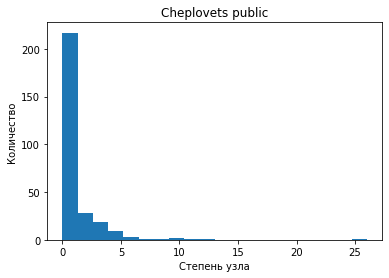

In [ ]:
plt.hist(degrees_cheplov,bins = 20)
plt.ylabel("Количество")
plt.xlabel("Степень узла")
plt.title("Cheplovets public")
plt.show()

##Вычислите кластерные коэффициенты обоих сообществ

Кластерный коэффициент (локальная плотность) - вероятность того, что два соседа в графе связаны между собой

In [ ]:
claster_coeff_cheplov = nx.average_clustering(g_cheplov)
claster_coeff_swim = nx.average_clustering(g_swim)

In [ ]:
print(f"Кластерный коэффицент для группы Что пловец? {claster_coeff_cheplov}")
print(f"Кластерный коэффицент для группы Swim {claster_coeff_swim}")

Кластерный коэффицент для группы Что пловец? 0.02688307627208611
Кластерный коэффицент для группы Swim 0.015374587838355956


##Вычислите среднюю длину пути обоих графов

In [ ]:
avg_SPL = []
g_swim_undirect = g_swim.to_undirected()
for c in nx.connected_components(g_swim_undirect):
  l = nx.average_shortest_path_length(g_swim_undirect.subgraph(c))
  if l !=0:
    avg_SPL.append(l)

avg_SPL_swim = sum(avg_SPL)/len(avg_SPL)
print(f"Средняя длина для графа сообщетсва Swim {avg_SPL_swim}")


avg_SPL = []
g_cheplov_undirect = g_cheplov.to_undirected()
for c in nx.connected_components(g_cheplov_undirect):
  l = nx.average_shortest_path_length(g_cheplov_undirect.subgraph(c))
  if l != 0:
    avg_SPL.append(l)
avg_SPL_cheplov = sum(avg_SPL)/len(avg_SPL)
print(f"Средняя длина для графа сообщетсва Че пловец? {avg_SPL_cheplov}")

Средняя длина для графа сообщетсва Swim 1.3227189477189478
Средняя длина для графа сообщетсва Че пловец? 1.2095704003598742


##Изучите существующие модели социальных сетей. Каковы характерные для них диапазоны оценок? Какую (или какие) из них напоминают исследуемые графы?

На практике не всегда получается подогнать сообщество под одну из существующих моделей, но вычисленные вами метрики помогут оценить сходство. Оцените, попадают ли получившиеся значения метрик в диапазоны оценок известных моделей, и с какой точностью определены характерные значения в вашем случае. В этом вам может помочь следующая таблица:

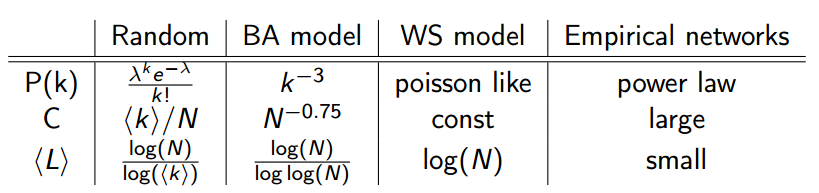

P(k) - распределение степеней графа
> 
C  - коэффицент кластеризации 
>
{L} - средняя длина пути
> 
N - количесвто узлов, K - степень узла

In [ ]:
import numpy as np

Распределение степеней в графе Swim из моделируемых наиболее сопоставима с Random

In [ ]:
# Предположим что Swim public можно смоделировать Random model graph
#Рассчитаем C, L

C_swim = (sum(degrees_swim)/len(degrees_swim))/len(g_swim)
print(f" Моделируемый коэффицент С = {C_swim} расчитаный C = {claster_coeff_swim}")

L_swim = np.log(len(g_swim))/np.log((sum(degrees_swim)/len(degrees_swim)))
print(f" Моделируемый коэффицент L = {abs(L_swim)} расчитаный L = {avg_SPL_swim}")

#Рассчитанные коэффиценты отличаются на порядок (вроде норм)

 Моделируемый коэффицент С = 0.0034539895913556907 расчитаный C = 0.015374587838355956
 Моделируемый коэффицент L = 15.894531054695154 расчитаный L = 1.3227189477189478


Распределение степеней в графе Cheplov из моделируемых наиболее сопоставима с похоже WS model 

In [ ]:
# Предположим что Swim public можно смоделировать Random model graph
#Рассчитаем C, L

L_cheplov = np.log(len(g_swim))
print(f" Моделируемый коэффицент L = {abs(L_cheplov)} расчитаный C = {avg_SPL_cheplov}")

#Рассчитанные коэффиценты находятся в рамках одного порядка

 Моделируемый коэффицент L = 5.332718793265369 расчитаный C = 1.2095704003598742
